In [1]:
import sys
sys.path.insert(1, "../python/architecture")
sys.path.insert(2, "../python/functions")

In [2]:
from model_functions import nn_load
from plotting_functions import nn_plot_mse, nn_plot_mse_many
import reproducible
import no_gpu

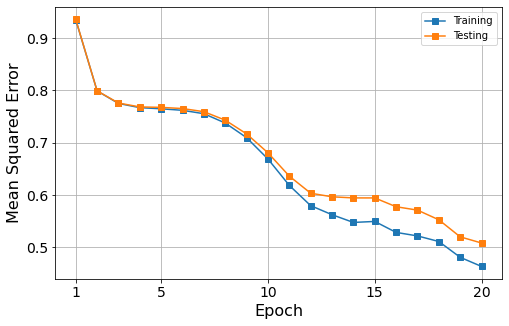

In [3]:
model = nn_load("../models/wine/wine_enkf_full_E20_B200_P1000_H2.h5")
nn_plot_mse(model,
            mse_mean = None,
            start_epoch = 1,
            tick_diff = 5,
            marker = True,
            savefig = False,
            file = "../img/wine/wine_enkf.png")

In [4]:
model_batches_dict = {}
batches = [100, 200, 500, 1000, 2000, 4163]

for b in batches:
    model_batches_dict["batch_size: {}".format(b)] = nn_load("../models/wine/wine_enkf_full_E20_B{}_P1000_H2.h5".format(b))

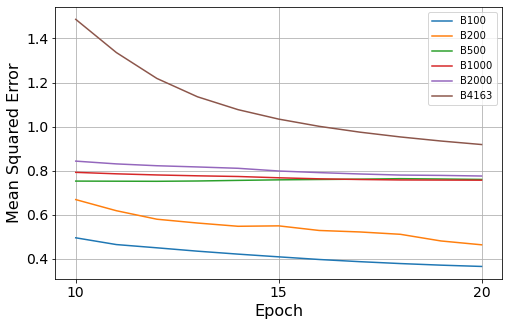

In [5]:
model_batches_list = list(model_batches_dict.values())
label_batches_list = ["B{}".format(list(model_batches_dict.keys())[i].split(": ")[1]) for i in range(len(model_batches_dict))]

nn_plot_mse_many(model_batches_list,
                 label_batches_list,
                 train_test = "train",
                 mse_mean = None,
                 start_epoch = 10,
                 tick_diff = 5,
                 savefig = False,
                 file = "../img/wine/wine_enkf_batches.png")

In [6]:
model_particles_dict = {}
particles = [100, 200, 500, 1000]

for p in particles:
    model_particles_dict["batch_size: {}".format(p)] = nn_load("../models/wine/wine_enkf_full_E20_B200_P{}_H2.h5".format(p))

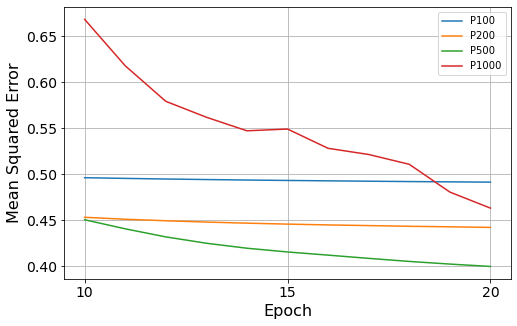

In [7]:
model_particles_list = list(model_particles_dict.values())
label_particles_list = ["P{}".format(list(model_particles_dict.keys())[i].split(": ")[1]) for i in range(len(model_particles_dict))]

nn_plot_mse_many(model_particles_list,
                 label_particles_list,
                 train_test = "train",
                 mse_mean = None,
                 start_epoch = 10,
                 tick_diff = 5,
                 savefig = False,
                 file = "../img/wine/wine_enkf_particles.png")